In [2]:
pip install pandas numpy matplotlib scikit-learn mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.1 MB/s eta 0:00:00-:--:--
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import KBinsDiscretizer

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Load the dataset
df = pd.read_csv('Global_Pollution_Analysis.csv')

# Display basic info
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (200, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh

In [4]:
# Display first few rows
print("\nFirst 5 rows:")
display(df.head())

# Check for missing values
print("\nMissing values:")
display(df.isnull().sum())

# Basic statistics
print("\nDescriptive statistics:")
display(df.describe())


First 5 rows:


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37



Missing values:


Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64


Descriptive statistics:


,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2009.335000,180.62695,115.068100,76.488550,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,5.765325,67.07331,47.580911,39.692727,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,2000.000000,50.30000,31.130000,11.150000,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,2004.000000,134.97250,74.550000,40.895000,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,2010.000000,183.38500,112.305000,78.600000,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,2014.000000,237.42500,157.477500,109.212500,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,2019.000000,297.95000,199.320000,149.230000,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


In [5]:
# Handle missing data (if any)
df_clean = df.dropna()

# Verify no missing values remain
print("Missing values after cleaning:")
display(df_clean.isnull().sum())

# Create categorical features for pollution severity
def categorize_pollution(series, bins=3, labels=['Low', 'Medium', 'High']):
    return pd.cut(series, bins=bins, labels=labels)

df_clean['Air_Pollution_Severity'] = categorize_pollution(df_clean['Air_Pollution_Index'])
df_clean['Water_Pollution_Severity'] = categorize_pollution(df_clean['Water_Pollution_Index'])
df_clean['Soil_Pollution_Severity'] = categorize_pollution(df_clean['Soil_Pollution_Index'])

# Categorize energy recovery
df_clean['Energy_Recovery_Category'] = categorize_pollution(df_clean['Energy_Recovered (in GWh)'], 
                                                         bins=3, labels=['Low', 'Medium', 'High'])

# Display the new categorical columns
print("\nAdded categorical columns:")
display(df_clean[['Air_Pollution_Severity', 'Water_Pollution_Severity', 
                'Soil_Pollution_Severity', 'Energy_Recovery_Category']].head())

Missing values after cleaning:


Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64


Added categorical columns:


,Air_Pollution_Severity,Water_Pollution_Severity,Soil_Pollution_Severity,Energy_Recovery_Category
0,High,Medium,Low,Low
1,Low,Low,High,High
2,Low,Low,High,High
3,High,Low,Medium,Low
4,Medium,Medium,High,Low


In [6]:
# Select only the categorical columns we created
apriori_data = df_clean[['Air_Pollution_Severity', 'Water_Pollution_Severity',
                        'Soil_Pollution_Severity', 'Energy_Recovery_Category']]

# Convert to one-hot encoded format
apriori_data = pd.get_dummies(apriori_data)

# Convert to boolean values (required by Apriori)
apriori_data = apriori_data.astype(bool)

# Display prepared data
print("\nData prepared for Apriori (first 5 rows):")
display(apriori_data.head())


Data prepared for Apriori (first 5 rows):


,Air_Pollution_Severity_Low,Air_Pollution_Severity_Medium,Air_Pollution_Severity_High,Water_Pollution_Severity_Low,Water_Pollution_Severity_Medium,Water_Pollution_Severity_High,Soil_Pollution_Severity_Low,Soil_Pollution_Severity_Medium,Soil_Pollution_Severity_High,Energy_Recovery_Category_Low,Energy_Recovery_Category_Medium,Energy_Recovery_Category_High
0,False,False,True,False,True,False,True,False,False,True,False,False
1,True,False,False,True,False,False,False,False,True,False,False,True
2,True,False,False,True,False,False,False,False,True,False,False,True
3,False,False,True,True,False,False,False,True,False,True,False,False
4,False,True,False,False,True,False,False,False,True,True,False,False


In [7]:
# Find frequent itemsets with minimum support of 0.1
frequent_itemsets = apriori(apriori_data, min_support=0.1, use_colnames=True)

# Display frequent itemsets
print("\nFrequent itemsets:")
display(frequent_itemsets.sort_values('support', ascending=False).head(10))

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort rules by confidence and lift
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

# Display top 10 rules
print("\nTop 10 Association Rules:")
display(rules.head(10))


Frequent itemsets:


,support,itemsets
1,0.420,(Air_Pollution_Severity_Medium)
4,0.360,(Water_Pollution_Severity_Medium)
6,0.355,(Soil_Pollution_Severity_Low)
9,0.350,(Energy_Recovery_Category_Low)
11,0.350,(Energy_Recovery_Category_High)
7,0.345,(Soil_Pollution_Severity_Medium)
2,0.335,(Air_Pollution_Severity_High)
5,0.325,(Water_Pollution_Severity_High)
3,0.315,(Water_Pollution_Severity_Low)
8,0.300,(Soil_Pollution_Severity_High)



Top 10 Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(Water_Pollution_Severity_Low),(Air_Pollution_Severity_Medium),0.315,0.420,0.155,0.492063,1.171580,1.0,0.022700,1.141875,0.213798,0.267241,0.124247,0.430556
26,(Water_Pollution_Severity_Low),(Energy_Recovery_Category_High),0.315,0.350,0.145,0.460317,1.315193,1.0,0.034750,1.204412,0.349862,0.278846,0.169719,0.437302
14,(Energy_Recovery_Category_High),(Air_Pollution_Severity_Medium),0.350,0.420,0.160,0.457143,1.088435,1.0,0.013000,1.068421,0.125000,0.262295,0.064039,0.419048
35,(Energy_Recovery_Category_Medium),(Water_Pollution_Severity_Medium),0.300,0.360,0.135,0.450000,1.250000,1.0,0.027000,1.163636,0.285714,0.257143,0.140625,0.412500
11,(Soil_Pollution_Severity_High),(Air_Pollution_Severity_Medium),0.300,0.420,0.135,0.450000,1.071429,1.0,0.009000,1.054545,0.095238,0.230769,0.051724,0.385714
8,(Soil_Pollution_Severity_Low),(Air_Pollution_Severity_Medium),0.355,0.420,0.155,0.436620,1.039571,1.0,0.005900,1.029500,0.059015,0.250000,0.028655,0.402834
6,(Water_Pollution_Severity_Medium),(Air_Pollution_Severity_Medium),0.360,0.420,0.155,0.430556,1.025132,1.0,0.003800,1.018537,0.038306,0.248000,0.018199,0.399802
12,(Energy_Recovery_Category_Low),(Air_Pollution_Severity_Medium),0.350,0.420,0.150,0.428571,1.020408,1.0,0.003000,1.015000,0.030769,0.241935,0.014778,0.392857
2,(Air_Pollution_Severity_Low),(Soil_Pollution_Severity_Medium),0.245,0.345,0.105,0.428571,1.242236,1.0,0.020475,1.146250,0.258278,0.216495,0.127590,0.366460
47,(Energy_Recovery_Category_Medium),(Soil_Pollution_Severity_Medium),0.300,0.345,0.125,0.416667,1.207729,1.0,0.021500,1.122857,0.245714,0.240385,0.109415,0.389493


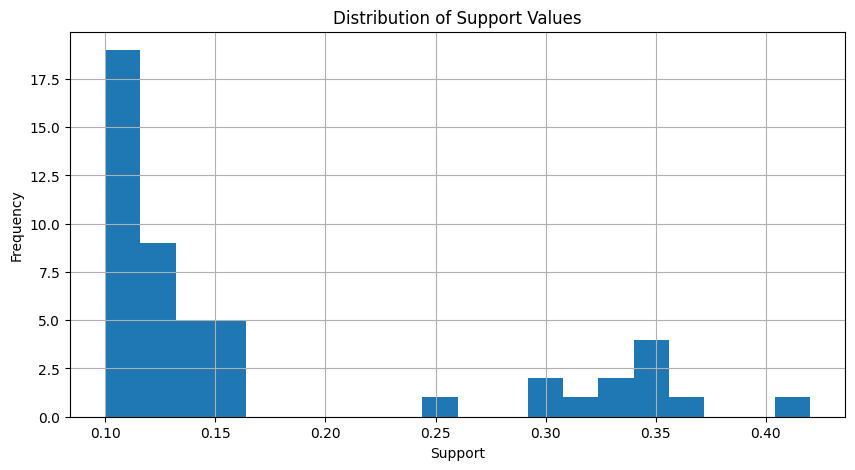

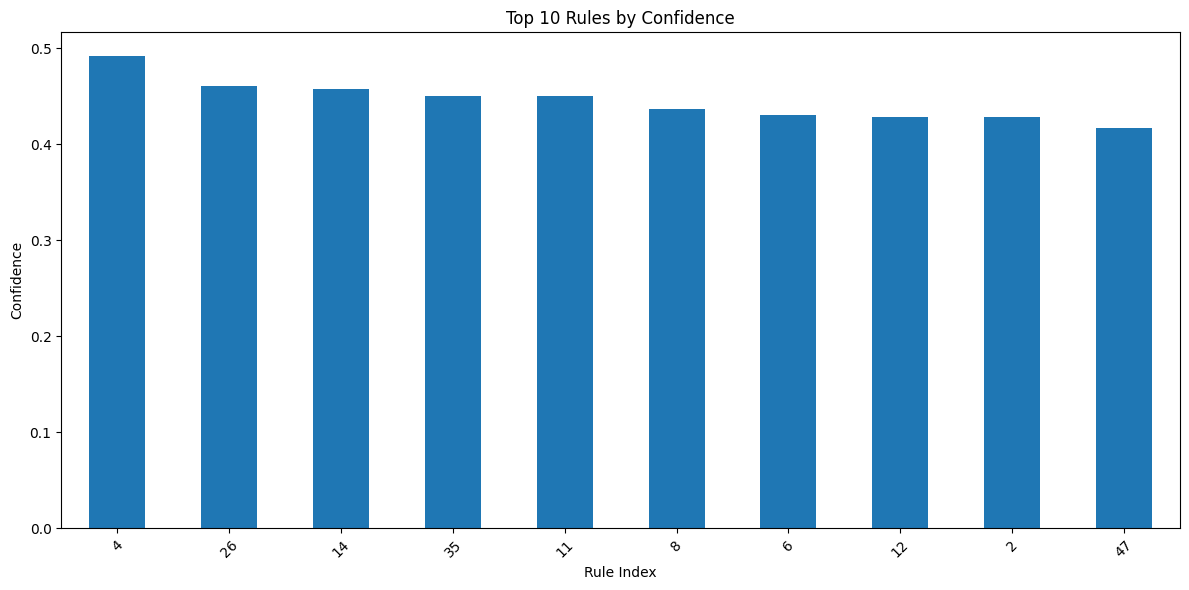

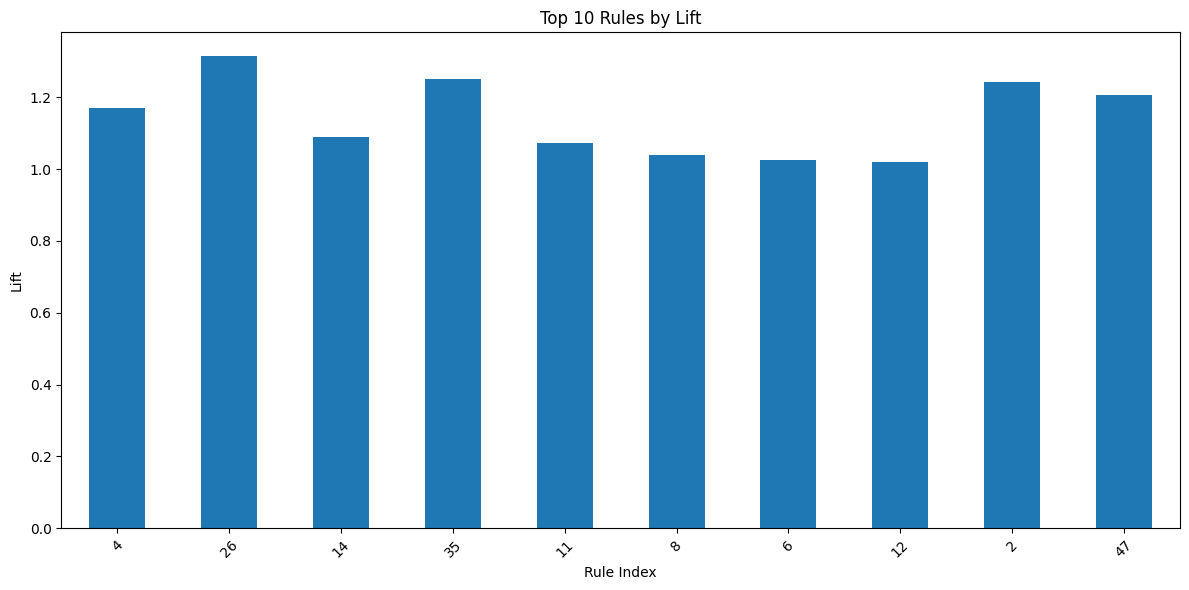

In [8]:
# Visualization 1: Support distribution
plt.figure(figsize=(10, 5))
frequent_itemsets['support'].hist(bins=20)
plt.title('Distribution of Support Values')
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Top rules by confidence
plt.figure(figsize=(12, 6))
rules.head(10)['confidence'].plot(kind='bar')
plt.title('Top 10 Rules by Confidence')
plt.xlabel('Rule Index')
plt.ylabel('Confidence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 3: Top rules by lift
plt.figure(figsize=(12, 6))
rules.head(10)['lift'].plot(kind='bar')
plt.title('Top 10 Rules by Lift')
plt.xlabel('Rule Index')
plt.ylabel('Lift')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Print key insights
print("KEY INSIGHTS:\n")

# Insight 1: Most common associations
print("1. Most Common Associations:")
top_rules = rules.head(3)
for i, row in top_rules.iterrows():
    antecedents = ", ".join([item.split('_')[-1] for item in list(row['antecedents'])])
    consequents = ", ".join([item.split('_')[-1] for item in list(row['consequents'])])
    print(f"   - When {antecedents} then {consequents} (Confidence: {row['confidence']:.2f})")

# Insight 2: High pollution patterns
print("\n2. High Pollution Patterns:")
high_pollution_rules = rules[rules['antecedents'].apply(lambda x: any('High' in item for item in x))]
for i, row in high_pollution_rules.head(2).iterrows():
    consequents = ", ".join([item.split('_')[-1] for item in list(row['consequents'])])
    print(f"   - High pollution often leads to {consequents} (Lift: {row['lift']:.2f})")

# Insight 3: Strongest associations
print("\n3. Strongest Associations:")
high_lift = rules.sort_values('lift', ascending=False).head(1)
antecedents = ", ".join([item.split('_')[-1] for item in list(high_lift['antecedents'].iloc[0])])
consequents = ", ".join([item.split('_')[-1] for item in list(high_lift['consequents'].iloc[0])])
print(f"   - The strongest association is between {antecedents} and {consequents}")
print(f"     with lift value of {high_lift['lift'].iloc[0]:.2f}")

# Recommendations
print("\nRECOMMENDATIONS:\n")
print("1. Countries with high pollution should examine their energy recovery systems")
print("2. Medium pollution levels may indicate opportunities for improvement in energy recovery")
print("3. Investigate why some low pollution countries have low energy recovery")
print("4. Consider regional patterns by analyzing countries with similar pollution profiles")

KEY INSIGHTS:

1. Most Common Associations:
   - When Low then Medium (Confidence: 0.49)
   - When Low then High (Confidence: 0.46)
   - When High then Medium (Confidence: 0.46)

2. High Pollution Patterns:
   - High pollution often leads to Medium (Lift: 1.09)
   - High pollution often leads to Medium (Lift: 1.07)

3. Strongest Associations:
   - The strongest association is between Low and High
     with lift value of 1.32

RECOMMENDATIONS:

1. Countries with high pollution should examine their energy recovery systems
2. Medium pollution levels may indicate opportunities for improvement in energy recovery
3. Investigate why some low pollution countries have low energy recovery
4. Consider regional patterns by analyzing countries with similar pollution profiles
